# Phân tích comments

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)
%matplotlib inline

In [98]:
post_df = pd.read_csv('data/vebay69/clean/posts_full.csv')
comment_df = pd.read_csv('data/vebay69/clean/comments_full.csv')

In [99]:
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20986 entries, 0 to 20985
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment_id      20986 non-null  int64 
 1   comment_url     20986 non-null  object
 2   commenter_id    20986 non-null  int64 
 3   commenter_url   20986 non-null  object
 4   commenter_name  20986 non-null  object
 5   commenter_meta  645 non-null    object
 6   comment_text    20986 non-null  object
 7   comment_time    20986 non-null  object
 8   comment_image   9564 non-null   object
 9   post_id         20986 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.6+ MB


In [100]:
comment_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,post_id
0,7293325574033680,https://facebook.com/7293325574033680,100003612977695,https://facebook.com/profile.php?id=1000036129...,Duy Mạnh,NaN,Nguyễn Quỳnh Chi kìa 🙄🙄,2023-10-25,NaN,674847581417116
1,749393307230801,https://facebook.com/749393307230801,100013343568769,https://facebook.com/chit.htoo.581730?eav=AfZN...,Cậu Cuối Hằng,NaN,Duy Mạnh 🥀Có group này cho kèo bóng hay dã man...,2023-11-04,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,674847581417116
2,1487108768797715,https://facebook.com/1487108768797715,100007184865648,https://facebook.com/thuantopp1904?eav=AfZ3iiR...,Đặng Thị Thuận Topp,NaN,Wo mần,2023-11-04,NaN,674847581417116
3,2324054461101038,https://facebook.com/2324054461101038,100003282592038,https://facebook.com/nhokvjz?eav=AfbauFXsyN4Kr...,Đức Anh,Top fan,:)),2023-10-25,NaN,674847581417116
4,869000111296727,https://facebook.com/869000111296727,1004645836,https://facebook.com/linh.hon.10?eav=AfZg22cKU...,Linh Trieu,NaN,Nam Anh,2023-10-25,NaN,674847581417116


### Fill các giá trị NaN thành chuỗi rỗng

In [101]:
comment_df.fillna('', inplace=True)

### Số bài đăng trong bộ dữ liệu comment

In [102]:
len(comment_df['post_id'].unique())

164

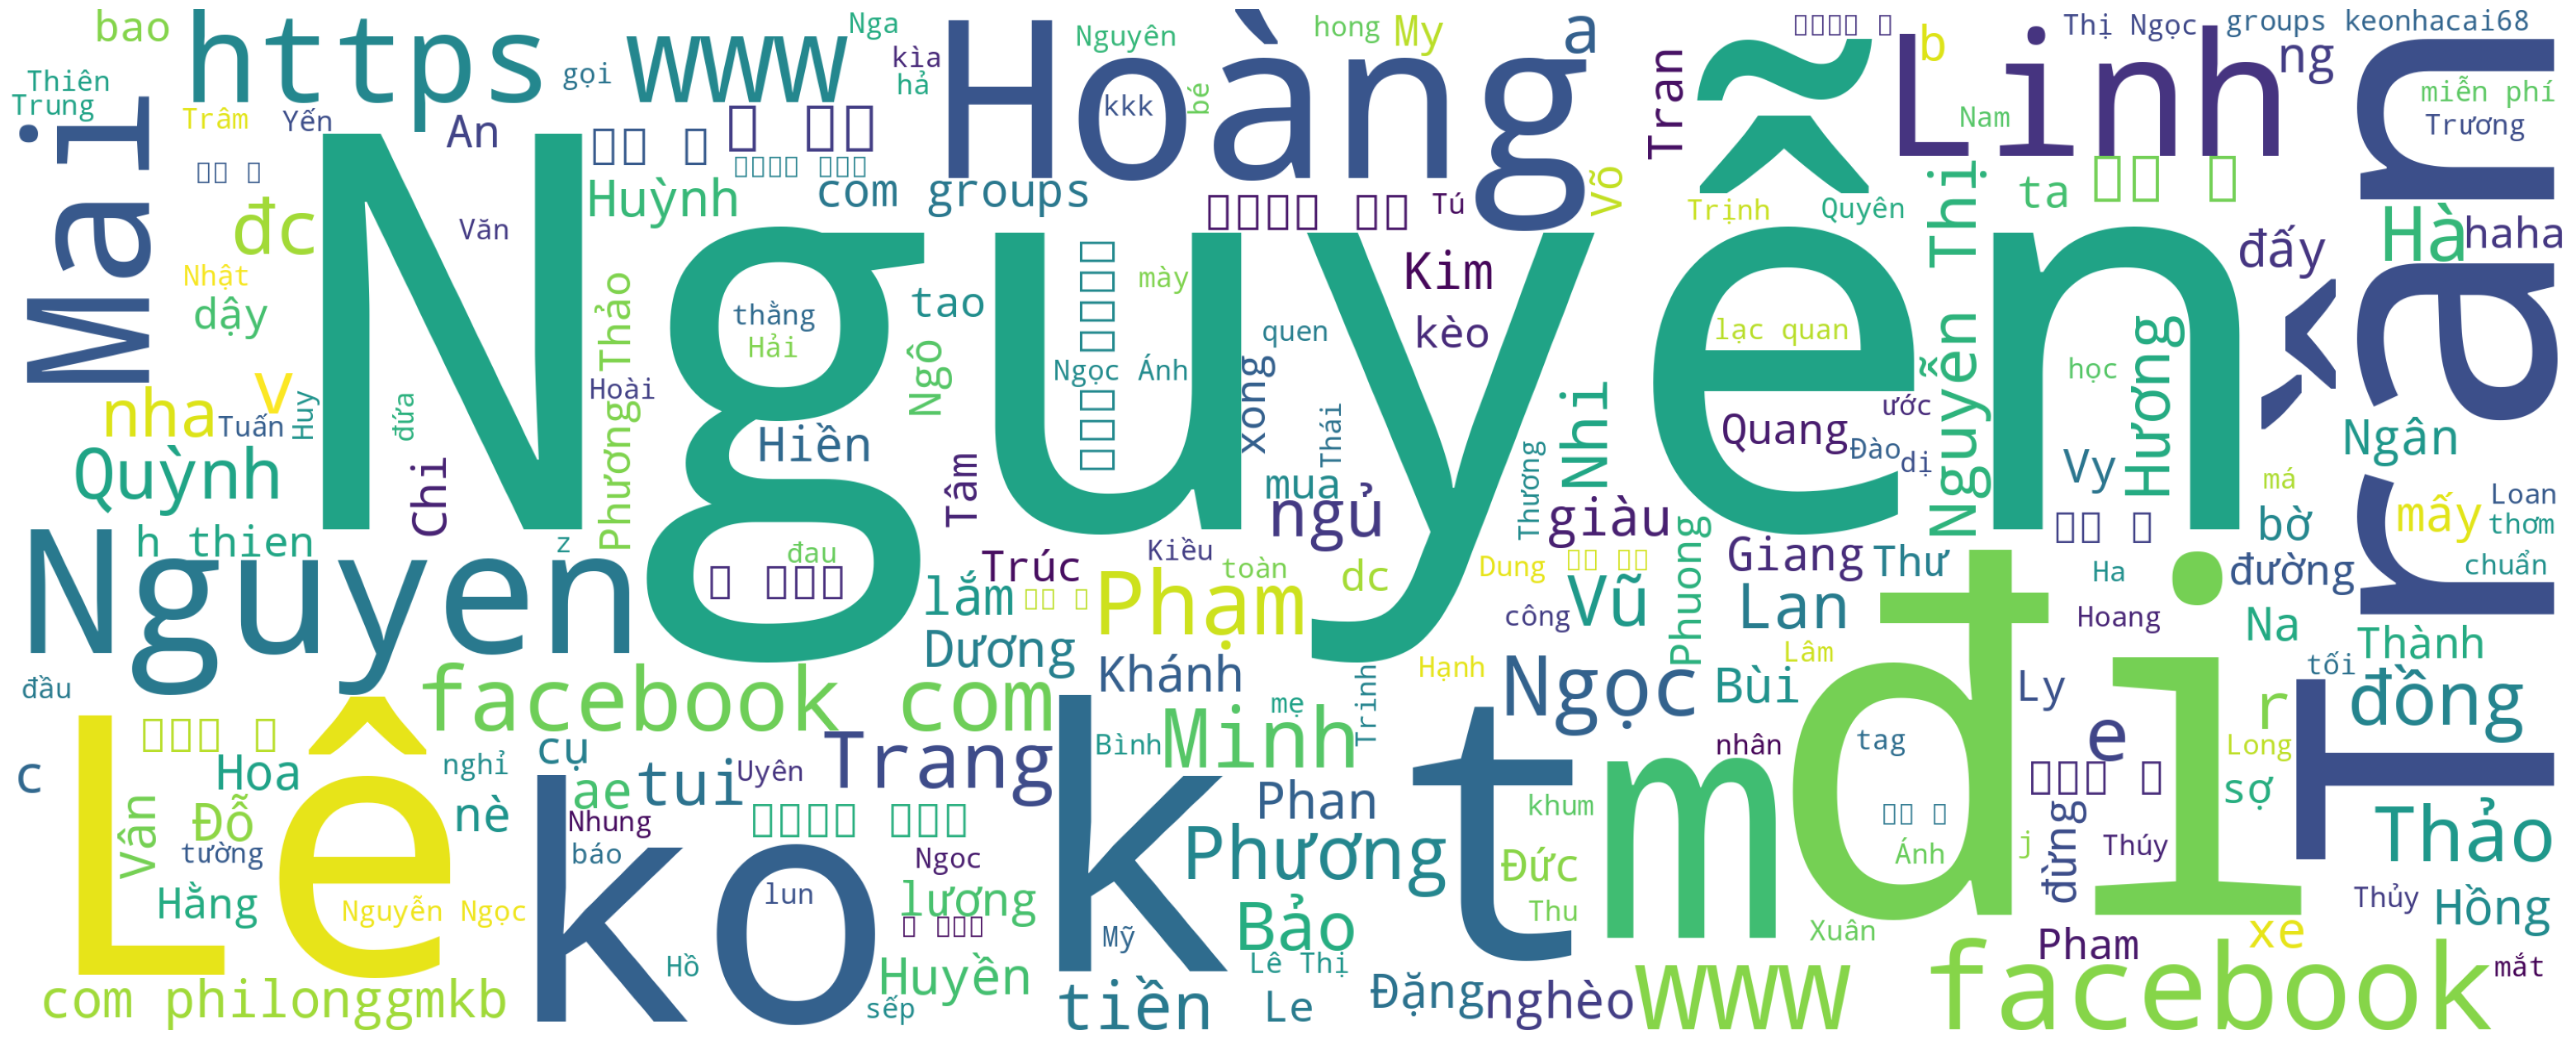

In [103]:
from wordcloud import WordCloud

# Danh sách các stopwords Tiếng Việt
stopwords = set(open('data/other/vietnamese-stopwords.txt', mode='r', encoding='utf-8').read().splitlines())

# Tokenize text
post_text = ' '.join(comment_df['comment_text'])

wordcloud = WordCloud(
    stopwords=stopwords, 
    background_color='white', 
    width=3000, 
    height=1200).generate(post_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Thống kê số comments, số  posts mà mỗi người comment

In [104]:
comment_count_df = comment_df.groupby(['commenter_name', 'commenter_id']).size().reset_index(name='comment_count')
post_count_df = comment_df.groupby(['commenter_name', 'commenter_id'])['post_id'].nunique().reset_index(name='post_count')
comment_post_df = post_count_df.merge(comment_count_df, left_index=True, right_index=True)
print(np.all(comment_post_df['commenter_id_x'] == comment_post_df['commenter_id_y']))
comment_post_df.drop(columns=['commenter_name_y', 'commenter_id_y'], inplace=True)
comment_post_df.rename(columns={
    'commenter_name_x': 'commenter_name',
    'commenter_id_x': 'commenter_id'
}, inplace=True)
comment_post_df.sort_values('comment_count', ascending=False)

True


,commenter_name,commenter_id,post_count,comment_count
12025,Thắng Triệu,100067699676030,33,202
12198,Tiệp Nguyễn,100001402249931,11,71
7076,Nguyễn Lê Sĩ,100003018061427,6,59
245,Ba Trương Ngọc,100051294306320,5,49
2511,Hoằng Tư Giang,100068862814022,6,45
...,...,...,...,...
1812,Hai Anh,100006965471151,1,1
1811,Hai Anh,100006165736235,1,1
7000,Nguyễn Kim Oanh,100017602890154,1,1
7001,Nguyễn Kim Phương,100013075908626,1,1


### Top các họ tên thường xuất hiện của commenters

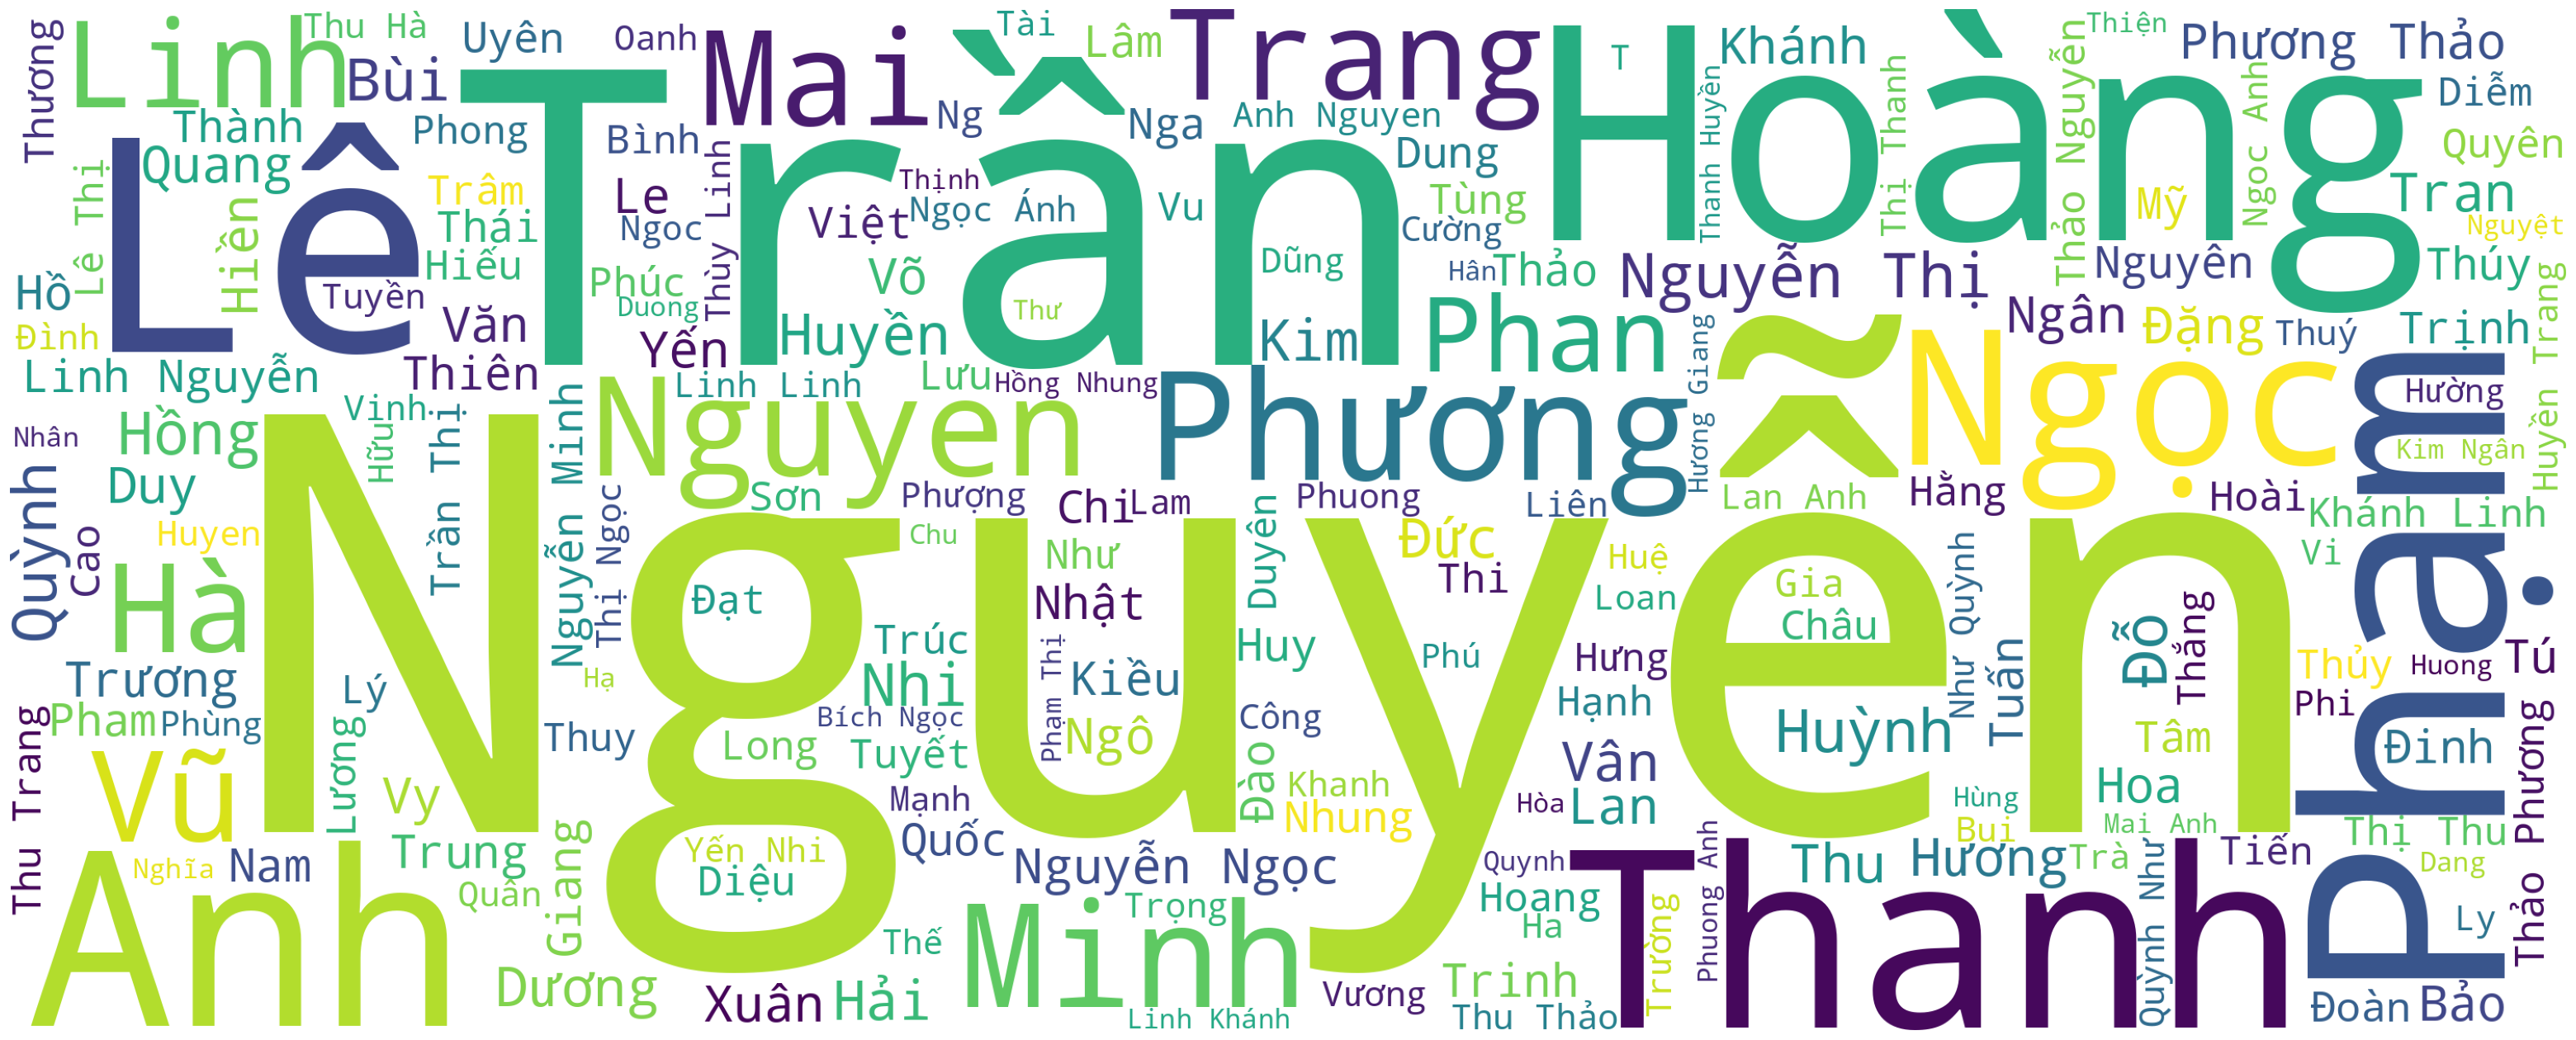

In [105]:
post_text = ' '.join(comment_post_df['commenter_name'])

wordcloud = WordCloud(
    background_color='white', 
    width=3000, 
    height=1200).generate(post_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Số lượng fan cứng

In [106]:
comment_df.loc[comment_df['commenter_meta'] == 'Top fan', 'commenter_id'].nunique()

307

In [107]:
top_fan_df = comment_df[comment_df['commenter_meta'] == 'Top fan']
top_fan_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,post_id
3,2324054461101038,https://facebook.com/2324054461101038,100003282592038,https://facebook.com/nhokvjz?eav=AfbauFXsyN4Kr...,Đức Anh,Top fan,:)),2023-10-25,,674847581417116
15,856851555849354,https://facebook.com/856851555849354,100025098080817,https://facebook.com/profile.php?id=1000250980...,Hoàng Long,Top fan,Trần Thành Nhân đời :)),2023-10-25,,674847581417116
35,715312463804338,https://facebook.com/715312463804338,100001675474337,https://facebook.com/jenny.gdragon?eav=AfbUO9A...,Jenny Kwon,Top fan,Thục Hiềnn,2023-10-25,,674847581417116
67,1266512201408737,https://facebook.com/1266512201408737,100015087003873,https://facebook.com/mihhdude?eav=Afap6TLrq9BB...,Minh Đức,Top fan,Lam Hoang Ngan thấy chưa nó nói hu mần kìa=)) ...,2023-10-25,https://scontent-sin6-2.xx.fbcdn.net/m1/v/t6/A...,674847581417116
69,1338059813748142,https://facebook.com/1338059813748142,100015087003873,https://facebook.com/mihhdude?eav=Afap6TLrq9BB...,Minh Đức,Top fan,Lam Hoang Ngan sự thật đấy. Be careful🙏🏻,2023-10-25,,674847581417116


In [108]:
top_fan_df.shape

(632, 10)

### Thống kê các fan cứng và số lượng bình luận của họ

In [109]:
comment_count_df = top_fan_df.groupby(['commenter_name', 'commenter_id']).size().reset_index(name='comment_count')
post_count_df = top_fan_df.groupby(['commenter_name', 'commenter_id'])['post_id'].nunique().reset_index(name='post_count')
comment_post_df = post_count_df.merge(comment_count_df, left_index=True, right_index=True)
print(np.all(comment_post_df['commenter_id_x'] == comment_post_df['commenter_id_y']))
comment_post_df.drop(columns=['commenter_name_y', 'commenter_id_y'], inplace=True)
comment_post_df.rename(columns={
    'commenter_name_x': 'commenter_name',
    'commenter_id_x': 'commenter_id'
}, inplace=True)
comment_post_df.sort_values('comment_count', ascending=False)

True


,commenter_name,commenter_id,post_count,comment_count
116,Lê T. Kim Hồng,100003268778639,27,29
300,Đình Tiến,100013000489006,26,27
9,Cheng Do,100004238532113,16,16
107,Linh Thúy,100017830726873,6,7
306,Đức Anh,100003282592038,7,7
...,...,...,...,...
126,Mai Ly,100001564946053,1,1
128,Mario Sâu Róm,100004771122999,1,1
130,Minh Ngô,100006458701703,1,1
131,Minh Phuc Nguyen,740722764,1,1
